In [1]:
%pylab inline
import ripy
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = ripy.Device()
d

DPD80 1550nm FC. SN: F704D-B706B-IC

In [3]:
Nsamp = int(15e-3 * d.samplerate)
Neach = 10

data = d.get_raw_data(Nsamp*Neach, mask=False, trig_mode='rising', trig_port='T', samples_per_trigger=Nsamp)
len(data)

12000000

In [4]:
Ncaps = 200

In [5]:
alldata = []
for i in tqdm(range(Ncaps)):
    data = d.get_raw_data(
        Nsamp*Neach, mask=False, 
        trig_mode='rising', trig_port='T',
        samples_per_trigger=Nsamp,
        arm_time=100)
    alldata.append(data)

100%|██████████| 200/200 [04:01<00:00,  1.21s/it]


In [6]:
dd = hstack(alldata)
dd = dd.reshape((len(dd)//Nsamp, Nsamp))
dd.nbytes / (2**20)

4577.63671875

In [7]:
save("19.03.27 pulses 100ms off 8000nW.npy", dd)

In [8]:
alldata = []
del dd

(0, 15)

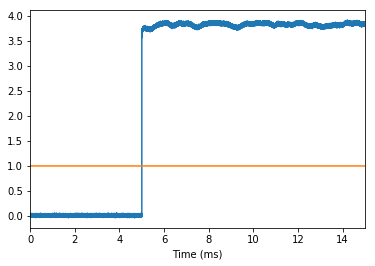

In [8]:
cal = r_[2.5e-3, -1.04]
def do_cal(a):
    return cal[0] * (a & 0x3fff) + cal[1]

def get_t(a):
    return (a >> 15) & 1

RATE = 80e6
Tsamp = 1./RATE
ts = arange(dd.shape[1]) / RATE

figure()

i = 32

plot(ts * 1e3, do_cal(dd[i]))
plot(ts * 1e3, (dd[i] >> 15) & 1)
xlabel("Time (ms)")
xlim(0, 15)

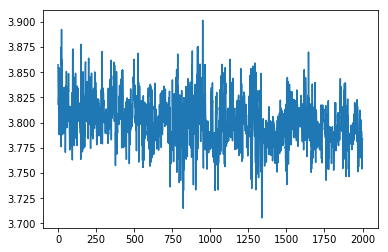

In [9]:
mask = (ts > 6e-3)

dcpower = empty(dd.shape[0])

for i in range(dd.shape[0]):
    dcpower[i] = mean(do_cal(dd[i][mask]))
    
figure()
plot(dcpower)